# CS145 Introduction to Data Mining - Assignment 2  
## Deadline: 11:59PM, April 21, 2025

## Instructions
Each assignment is structured as a Jupyter notebook, offering interactive tutorials that align with our lectures. You will encounter two types of problems: *write-up problems* and *coding problems*.

1. **Write-up Problems:** These problems are primarily theoretical, requiring you to demonstrate your understanding of lecture concepts and to provide mathematical proofs or explanations. Your answers should include sufficient steps for the mathematical derivations.
2. **Coding Problems:** These involve practical coding tasks. You may need to complete code segments provided in the notebooks (marked with **TODO** blocks) or write code from scratch. Please ensure your code is well-commented and executable.

### Formatting & Submission
- Use Markdown bullet points to format text answers, and use LaTeX for mathematical equations, e.g. `$\frac{\partial f}{\partial x}$`, rather than plain text.
- Submit your solutions through GradeScope in BruinLearn, **upload the runned ipynb file directly**, do not export as PDF.
- Late submissions are allowed up to 24 hours post-deadline with a penalty factor of
  $$
    \mathbf{1}(t \le 24) \exp\left(-\frac{\ln(2)}{12} t\right)
  $$
  where $t$ is the number of hours past the deadline.

### Collaboration & Integrity
- Collaboration is encouraged. However, the final submitted work must be *your own*.  
- Acknowledge any collaborators or external sources (including websites, textbooks, GitHub repositories, etc.).
- **Any** suspicious cases of academic misconduct will be reported to The Office of the Dean of Students.

# Part 1: Write-up (60 points)

### 1. k-Nearest Neighbors Fundamentals (15 points)
1. **Bias-Variance Intuition** (5 points)  
   When the number of neighbors $k$ in $k$-Nearest Neighbors is increased, does the model become more complex or simpler? Does the model variance increase or decrease? Briefly justify your answer in terms of bias and variance trade-off.

2. **Curse of Dimensionality and Distance Concentration** (10 points)  
   Consider points randomly sampled from a $ d $-dimensional unit hypercube $[0,1]^d$.  
   1. **(2 pts)** Let $X_1$ and $X_2$ be two random points in $[0,1]^d$. Express the expected *squared* Euclidean distance, $\mathbb{E}[(X_1 - X_2)^2]$, between these points in terms of $d$.  
   2. **(2 pts)** Similarly, derive $\mathrm{Var}[(X_1 - X_2)^2]$.  
   3. **(3 pts)** Show that as $d$ increases, the ratio of the standard deviation to the mean goes to 0:  
      $$
      \lim_{d \to \infty} \frac{\sqrt{\mathrm{Var}[(X_1 - X_2)^2]}}{\mathbb{E}[(X_1 - X_2)^2]} = 0.
      $$
   4. **(2 pts)** Explain why distances in high dimensions become concentrated around their mean value.  
   5. **(1 pt)** Conclude why this complicates finding truly *nearest* neighbors in high-dimensional data.

### 1. k-Nearest Neighbors Fundamentals

---

#### 1.1 Bias-Variance Intuition

When the number of neighbors $k$ increases in $k$-Nearest Neighbors:

- The model becomes **simpler**, since predictions are based on averaging over a **larger** neighborhood.
- **Variance decreases**: A higher $k$ smooths out predictions and makes the model less sensitive to individual training examples.
- **Bias increases**: Averaging over more points may lead to underfitting, especially near class boundaries or in heterogeneous regions.

**Trade-off**: Increasing $k$ reduces variance but increases bias.  
Low $k$ yields high-variance, low-bias models (complex),  
while high $k$ yields low-variance, high-bias models (simpler).

---

#### 1.2 Curse of Dimensionality and Distance Concentration

Let $X_1, X_2 \in [0,1]^d$ be two points sampled independently and uniformly from the $d$-dimensional unit hypercube.

---

**1. Expected Squared Euclidean Distance**

We compute the expected squared distance:

$$
\mathbb{E}[(X_1 - X_2)^2] = \sum_{i=1}^d \mathbb{E}[(X_{1i} - X_{2i})^2]
$$

For each coordinate $i$, since $X_{1i}, X_{2i} \sim \text{Uniform}[0,1]$ and are independent:

- Let $Z_i = X_{1i} - X_{2i}$.
- Then $Z_i$ is symmetric and follows a triangular distribution over $[-1, 1]$.
- Its second moment is:

$$
\mathbb{E}[Z_i^2] = \frac{1}{6}
$$

Thus:

$$
\mathbb{E}[(X_1 - X_2)^2] = d \cdot \frac{1}{6} = \frac{d}{6}
$$

---

**2. Variance of Squared Distance**

Since the dimensions are independent, variances add:

$$
\mathrm{Var}[(X_1 - X_2)^2] = \sum_{i=1}^d \mathrm{Var}[(X_{1i} - X_{2i})^2]
$$

From known properties of $Z_i$, it can be shown that:

$$
\mathrm{Var}[(X_{1i} - X_{2i})^2] = \frac{7}{180}
$$

Then:

$$
\mathrm{Var}[(X_1 - X_2)^2] = d \cdot \frac{7}{180} = \frac{7d}{180}
$$

---

**3. Concentration of Distances**

To show concentration, we analyze the ratio of standard deviation to the mean:

$$
\frac{\text{std}}{\text{mean}} = \frac{\sqrt{\mathrm{Var}[(X_1 - X_2)^2]}}{\mathbb{E}[(X_1 - X_2)^2]}
$$

Substituting in the expressions:

$$
\frac{\sqrt{\frac{7d}{180}}}{\frac{d}{6}} = \frac{6\sqrt{7d}}{d\sqrt{180}} = \frac{6\sqrt{7}}{\sqrt{180} \cdot \sqrt{d}} \rightarrow 0 \quad \text{as } d \rightarrow \infty
$$

✅ Therefore, as dimensionality increases, the **relative variability shrinks**, and distances become tightly clustered around the mean.

---

**4. Distance Concentration**

Since the expected squared distance grows linearly with $d$, but the standard deviation grows like $\sqrt{d}$, their **ratio decreases**. This leads to:

- Almost all distances between random points in high dimensions being approximately equal.
- Very little contrast between "near" and "far" neighbors.

---

**5. Nearest Neighbor Complication**

Because distances converge to a narrow range:

- It becomes hard to determine which points are actually "nearest".
- This breaks the assumption that "closer points are more similar", making $k$-NN less effective in high-dimensional spaces.

---



### 2. Decision Tree Fundamentals (25 points)
1. **Gini Index** (5 points)  
   Recall the Gini index for a region $R_i$:  
   $$
   \operatorname{Gini}(i) \;=\; 1 \;-\; \sum_{k} p(k \mid R_i)^2 \,.
   $$  
   - **(3 pts)** Under what scenario would the Gini index achieve its minimum value (0)? What does this indicate about the distribution of classes in region $R_i$?
   - **(2 pts)** Under what scenario would the Gini index achieve its maximum value? What would this maximum value be for a problem with $m$ classes, and what does it tell us about the purity of the region?

2. **Entropy, KL Divergence, and Decision Trees** (12 points)  
   Consider a random forest model predicting a patient's age range (Y) based on various health metrics (X) such as blood pressure, cholesterol levels, and BMI.
   
   Let X be the set of features and Y be the target variable (age range). The entropy of Y is defined as:
   $$
   H(Y) = \sum_{y} p(y) \, \log_2 \!\Bigl(\frac{1}{p(y)}\Bigr),
   $$  
   where p(y) is the probability of a patient falling into age range y.
   
   The conditional entropy of Y given X is defined as:
   $$
   H(Y|X) = \sum_{x} p(x) H(Y|X=x) = \sum_{x} p(x) \sum_{y} p(y|x) \, \log_2 \!\Bigl(\frac{1}{p(y|x)}\Bigr)
   $$
   
   The information gain used in decision trees is defined as:
   $$
   IG(Y,X) = H(Y) - H(Y|X)
   $$
   
   1. **(4 pts)** Let the *KL-divergence* between two distributions $p$ and $q$ be:  
      $$
      \mathrm{KL}(p \| q) = \sum_{x} p(x) \log_2\Bigl(\frac{p(x)}{q(x)}\Bigr),
      $$  
      Prove that the mutual information $I(Y;X) = H(Y) - H(Y|X)$ (which is the same as information gain) can be written as:  
      $$
      I(Y; X) = \mathrm{KL}\bigl(p(x,y) \bigl\| p(x)p(y)\bigr).
      $$
      
   2. **(4 pts)** In the context of our patient age prediction problem, explain what it means when the KL divergence between the joint distribution p(x,y) and the product of marginals p(x)p(y) is large. How does this relate to feature importance in decision trees?
   
   3. **(4 pts)** If a feature X provides no information about the target Y, what would be the value of H(Y|X)? What would be the information gain in this case, and what does this mean for decision tree splitting?

3. **Constructing an Optimal Decision Tree** (8 points)  

  You are given two 2D binary classification datasets, where each point belongs to either class 0 (denoted by ⭘) or class 1 (denoted by ×), as shown in the figure below.

  - The **left plot** shows a dataset with 4 data points: two from each class.
  - The **right plot** shows a dataset with a larger number of points, where class 1 points (×) form a dense cluster in the center, surrounded by class 0 points (⭘).

  #### **Your Task:**

  (1) **Decision Tree Construction (4 pts)**

  For **each dataset**, describe *verbally* a binary decision tree that achieves **100% classification accuracy**. Your description should include:

  - (i) The **feature** used and the **threshold** value at each split (i.e., the decision rule for that node),
  - (ii) The **predicted class** in each resulting region,
  - (iii) The **depth level** of each split (start with depth 0 at the root).

  You **do not** need to draw the decision tree or illustrate the decision regions—focus on a clear verbal description of the logic and structure.

  (2) **Tree Depth (3 pts)**  
  Report the **depth** of each of your decision trees. Recall that the depth of a tree is defined as the length of the **longest path from the root to a leaf node**, where the root is at depth 0.

  (3) **Discussion (1 pt)**  
  Briefly discuss whether fully grown decision trees are prone to overfitting, and suggest one or two practical strategies for preventing overfitting in decision tree models.

  ![Decision Tree Datasets](https://drive.google.com/uc?id=1bzI5--UGsXEFJU17z3odALx0DS1TA_xn)

### 2. Decision Tree Fundamentals (25 points)

---

#### 2.1 Gini Index

The Gini index for a region $R_i$ is defined as:

$$
\text{Gini}(i) = 1 - \sum_k p(k \mid R_i)^2
$$

- **Minimum Gini Index (3 pts)**

The Gini index achieves its **minimum value of 0** when the region $R_i$ is **pure**, i.e., all samples in $R_i$ belong to the same class. In this case:

$$
p(k \mid R_i) = 1 \text{ for some } k, \quad \text{and } 0 \text{ for all others}
$$

So:

$$
\text{Gini}(i) = 1 - (1)^2 = 0
$$

This indicates that the region contains **no uncertainty** — perfect homogeneity.

- **Maximum Gini Index (2 pts)**

The Gini index is maximized when all classes are **equally likely** in the region. For $m$ classes:

$$
p(k \mid R_i) = \frac{1}{m} \quad \text{for all } k
$$

Then:

$$
\text{Gini}_{\max} = 1 - \sum_{k=1}^{m} \left( \frac{1}{m} \right)^2 = 1 - \frac{m}{m^2} = 1 - \frac{1}{m}
$$

This corresponds to the **maximum impurity** — the region is completely mixed.

---

#### 2.2 Entropy, KL Divergence, and Decision Trees

Let $X$ be features and $Y$ be the target class (e.g., age range). The entropy and conditional entropy are defined as:

$$
H(Y) = \sum_y p(y) \log_2 \left( \frac{1}{p(y)} \right), \quad
H(Y|X) = \sum_x p(x) \sum_y p(y|x) \log_2 \left( \frac{1}{p(y|x)} \right)
$$

The information gain is:

$$
IG(Y, X) = H(Y) - H(Y|X)
$$

- **(1) Proving Mutual Information as KL Divergence (4 pts)**

Let:

$$
\mathrm{KL}(p(x, y) \parallel p(x)p(y)) = \sum_{x, y} p(x, y) \log_2 \left( \frac{p(x, y)}{p(x)p(y)} \right)
$$

This is equivalent to mutual information:

$$
I(Y; X) = \sum_{x, y} p(x, y) \log_2 \left( \frac{p(x, y)}{p(x)p(y)} \right) = \mathrm{KL}(p(x, y) \parallel p(x)p(y))
$$

So:

$$
I(Y; X) = H(Y) - H(Y|X) = \mathrm{KL}(p(x, y) \parallel p(x)p(y))
$$

✅ Therefore, information gain measures the **difference between the joint distribution and the product of marginals**, i.e., how dependent $X$ and $Y$ are.

---

- **(2) Interpretation of Large KL Divergence (4 pts)**

A large KL divergence means that $p(x, y)$ is very different from $p(x)p(y)$ — in other words, $X$ and $Y$ are **highly dependent**.

**Interpretation in decision trees**:  
If a feature $X$ has high KL divergence with $Y$, it provides significant information about the target. Therefore, such a feature will be prioritized for splitting by the decision tree, as it reduces entropy the most (i.e., gives high information gain).

---

- **(3) No Information Case (4 pts)**

If a feature $X$ provides **no information** about the target $Y$, then:

$$
p(y|x) = p(y)
$$

This implies:

$$
H(Y|X) = H(Y) \quad \Rightarrow \quad IG(Y, X) = H(Y) - H(Y|X) = 0
$$

➡️ The feature does not help reduce uncertainty and thus is **not useful** for splitting in the decision tree.

---
#### 2.3 Constructing an Optimal Decision Tree

---

**(1) Decision Tree Construction (4 pts)**

- **Left Plot (4 points)**  
  This plot has 4 data points:  
  - Two circles (⭘, class 0) — bottom-left and top-right  
  - Two crosses (×, class 1) — top-left and bottom-right

  These form an **X pattern**, so a **single axis-aligned split** cannot cleanly separate the two classes.

  - **Split 1 (Depth 0):** Feature: $x_2$, Threshold ≈ 2.5  
    - If $x_2 \leq 2.5$: go to right child  
    - If $x_2 > 2.5$: go to left child
  - **Split 2 (Depth 1, left child):** Feature: $x_1$, Threshold ≈ 2.5  
    - If $x_1 \leq 2.5$ → Class 0 (⭘)  
    - If $x_1 > 2.5$ → Class 1 (×)
  - **Split 3 (Depth 1, right child):** Feature: $x_1$, Threshold ≈ 2.5  
    - If $x_1 \leq 2.5$ → Class 1 (×)  
    - If $x_1 > 2.5$ → Class 0 (⭘)

  ✅ This results in **100% classification accuracy**.

---

- **Right Plot (4 points)**  
  This plot has a cluster of × (class 1) in the center, surrounded by ⭘ (class 0) in a grid-like outer ring.

  - **Split 1 (Depth 0):** Feature: $x_2$, Threshold ≈ 4.5  
    - If $x_2 \leq 4.5$: go to left child (bottom half)  
    - If $x_2 > 4.5$: go to right child (top half)

  - **Split 2 (Depth 1, left child):** Feature: $x_1$, Threshold ≈ 4.5  
    - If $x_1 \leq 4.5$ → Class 0 (⭘)  
    - If $x_1 > 4.5$ → Class 1 (×)

  - **Split 2 (Depth 1, right child):** Feature: $x_1$, Threshold ≈ 3.5  
    - If $x_1 \leq 3.5$ → Class 0 (⭘)  
    - If $x_1 > 3.5$ → Class 1 (×)

  ✅ This tree separates the central × cluster from the outer ⭘s and gives 100% accuracy.

---

**(2) Tree Depth (3 pts)**

- **Left plot:** Depth = 2  
  (3 levels: root → 2 branches → 4 leaves)

- **Right plot:** Depth = 2  
  (root + one internal level + leaf nodes)

---

**(3) Discussion (1 pt)**

Fully grown decision trees are prone to **overfitting**, especially when they memorize fine-grained patterns in the training data that don’t generalize.

**Prevention strategies:**
- Set a limit on tree depth (`max_depth`)
- Require a minimum number of samples per split (`min_samples_split`)
- Use **ensemble methods** like:
  - **Random Forests** (reduces variance)
  - **Gradient Boosted Trees** (improves bias and variance)

---


### 3. Practical Considerations & Discussion (10 points)
1. **(5 pts)** For a highly skewed dataset (e.g., some features have very large numeric values compared to others), explain how you might preprocess or normalize your data before applying $k$-Nearest Neighbors or Decision Trees.  
2. **(5 pts)** Are decision trees robust to outliers? Discuss briefly why or why not, and provide one strategy to mitigate the influence of outliers when training trees.

### 3. Practical Considerations & Discussion

---

**1. Preprocessing Skewed Data for $k$-Nearest Neighbors and Decision Trees**

In a highly skewed dataset — where some features have much larger numeric ranges than others — distance-based algorithms like $k$-Nearest Neighbors ($k$-NN) can be significantly impacted. Features with larger magnitudes dominate the distance calculations, leading to biased neighbor selection.

To address this:

- **Standardization** (Z-score normalization): Rescale features to have zero mean and unit variance.
  
  $$
  x' = \frac{x - \mu}{\sigma}
  $$

- **Min-Max Scaling**: Rescales values to a fixed range, usually [0, 1].

  $$
  x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
  $$

- For **$k$-NN**, normalization is **essential**, since it relies directly on Euclidean or similar distance metrics.

- For **decision trees**, normalization is **not necessary**, since trees split on thresholds and are invariant to feature scale. However, **skewness** may still affect tree structure if it causes imbalanced splitting.

---

**2. Are Decision Trees Robust to Outliers?**

Decision trees are **partially robust** to outliers but not immune:

- Since decision trees split based on feature thresholds that reduce impurity (e.g., Gini or entropy), a few extreme outliers **may not influence the split** if they do not shift the impurity measure significantly.
  
- However, outliers **can still distort** splits if they lie in critical regions or create misleading impurity reductions.

**Mitigation Strategy:**

- **Prune the tree** using hyperparameters such as:
  - `max_depth`
  - `min_samples_split`
  - `min_samples_leaf`
  
  These prevent overly specific splits that overfit to rare outliers.

- Alternatively, **use robust algorithms** like **Random Forests**, which average over many trees and reduce sensitivity to individual data points.

---


### 4. Multi-Layer Perceptron (MLP) Calculation (10 points)

![MLP Diagram](https://drive.google.com/uc?id=1i4le3s3-Q5wSid_W-XCKUgB-BQFm39jK)

Consider a 2-layer MLP with the following architecture for binary classification:

The network uses the following parameters:
- Hidden layer weights: W₁ = [[0.2, 0.5, -0.1], [0.1, -0.3, 0.4]]
- Hidden layer biases: b₁ = [0.1, -0.2]
- Output layer weights: W₂ = [0.6, 0.3]
- Output layer bias: b₂ = -0.1
- Activation function for hidden layer: ReLU(x) = max(0, x)
- Activation function for output layer: sigmoid(x) = 1/(1+exp(-x))

Given an input vector x = [1, 2, 0.5]:

1. **(4 pts)** Calculate the values of the hidden layer neurons h₁ and h₂ after applying the ReLU activation.
2. **(3 pts)** Calculate the value of the output neuron y after applying the sigmoid activation.
3. **(3 pts)** If this is a binary classification problem, what class would this input be assigned to using a threshold of 0.5? Explain why.

### 4. Multi-Layer Perceptron (MLP) Calculation

---

#### **1. Hidden Layer Calculation**

Given input vector:

$$
\mathbf{x} = [1,\; 2,\; 0.5]
$$

Hidden layer weights:

$$
W_1 = \begin{bmatrix}
0.2 & 0.5 & -0.1 \\
0.1 & -0.3 & 0.4
\end{bmatrix}, \quad \mathbf{b}_1 = [0.1,\; -0.2]
$$

We compute the pre-activation values:

- For $h_1$:

$$
z_1^{(1)} = 0.2(1) + 0.5(2) + (-0.1)(0.5) + 0.1 = 0.2 + 1.0 - 0.05 + 0.1 = 1.25
$$

- For $h_2$:

$$
z_1^{(2)} = 0.1(1) + (-0.3)(2) + 0.4(0.5) - 0.2 = 0.1 - 0.6 + 0.2 - 0.2 = -0.5
$$

Apply ReLU activation:

$$
h_1 = \max(0, 1.25) = 1.25 \quad ; \quad h_2 = \max(0, -0.5) = 0
$$

**Hidden layer output**:

$$
\mathbf{h} = [1.25,\; 0]
$$

---

#### **2. Output Layer Calculation**

Output layer weights:

$$
\mathbf{W}_2 = [0.6,\; 0.3], \quad b_2 = -0.1
$$

Compute:

$$
z_2 = 0.6(1.25) + 0.3(0) - 0.1 = 0.75 - 0.1 = 0.65
$$

Apply sigmoid activation:

$$
\hat{y} = \frac{1}{1 + e^{-0.65}} \approx \frac{1}{1 + 0.522} \approx \frac{1}{1.522} \approx 0.656
$$

---

#### **3. Classification Decision**

Using a threshold of 0.5:

- Since $\hat{y} = 0.656 > 0.5$, we classify this input as **class 1**.

**Conclusion**: The MLP outputs a probability of 0.656 for class 1, which exceeds the decision threshold of 0.5, so the predicted class is:

$$
\boxed{1}
$$

---


# Part 2: Coding (50 points)

**Important**: The coding problems are designed to run as Jupyter notebooks. Throughout the provided starter notebook, you will find **TODO** blocks to guide your implementation. Make sure to fill in these code blocks. **Do not** remove or rename the provided function signatures.


### 2.1.1 Toy Example: 2D Points
Let us revisit the two-class setup where:
- **Class 1 (Blue points):** $(1,3), (3,6), (4,7)$
- **Class 2 (Red points):** $(4,3), (5,5), (2,1)$

1. **(5 pts)** **1-NN Decision Boundary**  
   - **TODO**: Write Python code to:
     1. Store the above data points and labels.
     2. Define a function `knn_predict(x, data, labels, k=1)` that returns the predicted class using 1-NN.
     3. Plot the points with different colors for each class.
     4. Generate a decision boundary mesh (e.g., use `np.meshgrid`) and color each cell according to the 1-NN prediction.  
   - Provide a final **visualization** of the boundary in your notebook.

2. **(5 pts)** **3-NN Decision Boundary**  
   - **TODO**: Reuse your code from above but change $k=3$.  
   - Plot and interpret any noticeable differences compared to the $k=1$ boundary.

3. **(5 pts)** **Data-Scaling Concern**  
   Suppose the blue points become $(1,30), (3,60), (4,70)$, while the red points become $(4,30), (5,50), (2,10)$.  
   - **TODO**: Plot and show the **1-NN** decision boundary with these new points.  
   - Briefly explain the potential issue here and how you might address it (e.g., normalization).


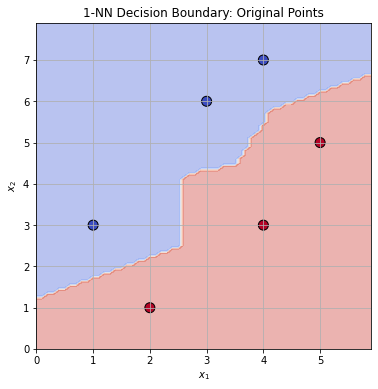

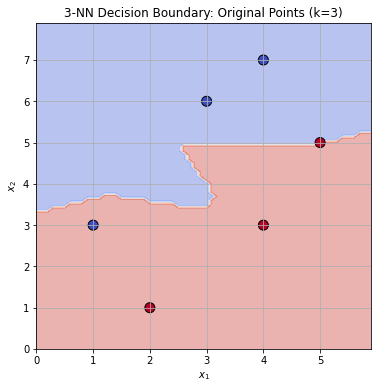

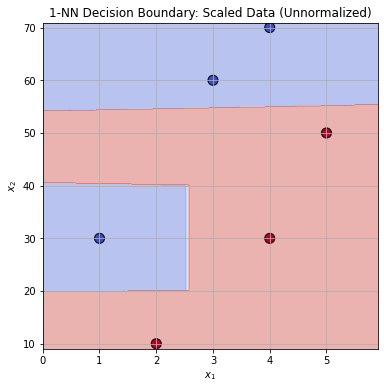

In [2]:
# TODO: Provide and execute your code implementations here
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------
# Utility Functions
# ---------------------------------------------

def knn_predict(x, data, labels, k=1):
    dists = np.linalg.norm(data - x, axis=1)
    nearest_indices = np.argsort(dists)[:k]
    nearest_labels = labels[nearest_indices]
    counts = np.bincount(nearest_labels)
    return np.argmax(counts)

def plot_decision_boundary(data, labels, k, title, resolution=0.1):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = np.array([knn_predict(p, data, labels, k=k) for p in grid_points])
    Z = predictions.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm', edgecolor='k', s=100)
    plt.title(f"{k}-NN Decision Boundary: " + title)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(True)
    plt.show()

# ---------------------------------------------
# Part 1: 1-NN with Original Data
# ---------------------------------------------

# Class 1: Blue -> label 0
# Class 2: Red -> label 1
blue_points = np.array([[1, 3], [3, 6], [4, 7]])
red_points = np.array([[4, 3], [5, 5], [2, 1]])
data_1 = np.vstack((blue_points, red_points))
labels_1 = np.array([0]*3 + [1]*3)

plot_decision_boundary(data_1, labels_1, k=1, title="Original Points")

# ---------------------------------------------
# Part 2: 3-NN with Same Data
# ---------------------------------------------

plot_decision_boundary(data_1, labels_1, k=3, title="Original Points (k=3)")

# ---------------------------------------------
# Part 3: Scaling Concern Example (No Normalization)
# ---------------------------------------------

# Scaled values for blue and red points
blue_scaled = np.array([[1, 30], [3, 60], [4, 70]])
red_scaled = np.array([[4, 30], [5, 50], [2, 10]])
data_scaled = np.vstack((blue_scaled, red_scaled))
labels_scaled = np.array([0]*3 + [1]*3)

plot_decision_boundary(data_scaled, labels_scaled, k=1, title="Scaled Data (Unnormalized)")

# Comment: In this case, the vertical axis dominates due to the large magnitude. You should normalize.


When features have very different scales (e.g., $x_2$ ranges from 10 to 70 while $x_1$ is 1–5), the Euclidean distance becomes dominated by the feature with the largest scale. This skews neighbor selection toward that dimension.

To address this:
- **Normalize** the data using StandardScaler or MinMaxScaler so that all features contribute equally to distance calculations in $k$-NN.

4. **(5 pts)** **Choosing $k$ for Larger Datasets**  
   - **Write-up in Markdown**: If you have 1000 samples, describe a procedure to find the “optimal” $k$ (e.g., cross-validation).  

### 2.1.2 Choosing $k$ for Larger Datasets

To choose the optimal number of neighbors $k$ in $k$-Nearest Neighbors (k-NN) for a dataset with 1000 samples, we can use **cross-validation** as follows:

1. **Define a candidate set of $k$ values**, e.g., $k \in \{1, 3, 5, 7, 9, 11, 15\}$.

2. **Split the data** into training and validation sets using **$k$-fold cross-validation** (e.g., 5-fold or 10-fold):
   - In each fold, divide the data into a training set (e.g., 90%) and a validation set (10%).
   - Train the k-NN model on the training subset and evaluate its performance (e.g., classification accuracy or F1 score) on the validation subset.

3. **Average the performance metric** (e.g., validation accuracy) across all folds for each candidate $k$.

4. **Choose the $k$ with the highest average performance** as the optimal value.

5. **Retrain the final model** using the selected $k$ on the full dataset (or final training set) before testing on unseen data.

This method helps prevent overfitting (which occurs with very small $k$) or underfitting (with overly large $k$), ensuring good generalization to new data.


## 2.2 KNN Regression (10 points)

We now explore *KNN Regression* on a small set of 2D points:
$$
\begin{aligned}
&(2,4) \to 2, \quad (3,5) \to 5, \quad (5,7) \to 3, \quad (3,2) \to 6, \quad (6,6) \to 2,\\
&(8,8) \to 8, \quad (4,5) \to 3, \quad (2,8) \to 5, \quad (7,2) \to 7, \quad (9,9) \to 11.
\end{aligned}
$$

Assume these are $(x, y)$-coordinates with some *target* (regression) label on the right.

1. **(2.5 pts)** Using $k=1$, predict the target for a new point $x'=(10,9)$.  
2. **(2.5 pts)** Using $k=3$, predict the target for the same $x'$.  
3. **(2.5 pts)** Using $k=10$, predict the target for $x'$.  
4. **(2.5 pts)** Over what range of $k$ can you choose? If the true label of $x'$ were 7.5, which $k$ would have given the best prediction?

**TODO**:  
- Write code to implement a simple `knn_regression_predict(x, data, labels, k)` function.  
- Print out the predictions for $k=1, 3, 10$.  
- You may hard-code the data points or store them in a NumPy array.  


In [5]:
# TODO: Provide and execute your code implementations here
import numpy as np

# ---------------------------------------------
# Data: (x, y) coordinates and regression targets
# ---------------------------------------------

points = np.array([
    [2, 4],
    [3, 5],
    [5, 7],
    [3, 2],
    [6, 6],
    [8, 8],
    [4, 5],
    [2, 8],
    [7, 2],
    [9, 9]
])

targets = np.array([2, 5, 3, 6, 2, 8, 3, 5, 7, 11])  # target values for each point

# ---------------------------------------------
# Function to perform KNN regression
# ---------------------------------------------

def knn_regression_predict(x_query, data, labels, k):
    distances = np.linalg.norm(data - x_query, axis=1)
    nearest_indices = np.argsort(distances)[:k]
    nearest_targets = labels[nearest_indices]
    prediction = np.mean(nearest_targets)
    return prediction

# ---------------------------------------------
# Test input
# ---------------------------------------------

x_query = np.array([10, 9])

# Predictions for different k
for k in [1, 3, 10]:
    pred = knn_regression_predict(x_query, points, targets, k)
    print(f"Prediction for k={k}: {pred:.2f}")


Prediction for k=1: 11.00
Prediction for k=3: 7.00
Prediction for k=10: 5.20


The value of $k$ can range from 1 to 10 (since we have 10 data points).

If the true label of $x' = (10, 9)$ is 7.5, then:

- $k=1$ predicts 11.00 (error = 3.5)
- $k=3$ predicts 7.00 (error ≈ 0.5)
- $k=10$ predicts 5.20 (error ≈ 2.3)

✅ Therefore, $k=3$ gives the best prediction for this input point under the assumption that the true label is 7.5.


## 2.3 Decision Tree Exercises (20 points)

We will explore decision trees using **scikit-learn** on a real dataset (e.g., the Iris dataset).

1. **(5 pts)** **Data Loading & Preprocessing**  
   **TODO**:  
   - Load the [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) using `sklearn.datasets.load_iris()`.  
   - Split it into train/test subsets (e.g., 80% train, 20% test).  

2. **(5 pts)** **Training a Decision Tree**  
   **TODO**:  
   - Train a `DecisionTreeClassifier` from `sklearn.tree` on the training set.  
   - Report the training and test accuracies.

3. **(5 pts)** **Visualizing the Tree**  
   **TODO**:  
   - Use `sklearn.tree.plot_tree` to visualize the fitted decision tree.  
   - Interpret the first split: which feature was used, and what was the threshold?

4. **(5 pts)** **Tree Depth & Pruning**  
   **TODO**:  
   - Print out the depth of the trained tree.  
   - Retrain the tree using a `max_depth` of 2 or 3. Compare the test accuracy with the unpruned tree.  
   - Briefly comment on how pruning affects performance and overfitting.


Train shape: (120, 4), Test shape: (30, 4)

[Unpruned Tree] Train Accuracy: 1.000, Test Accuracy: 1.000


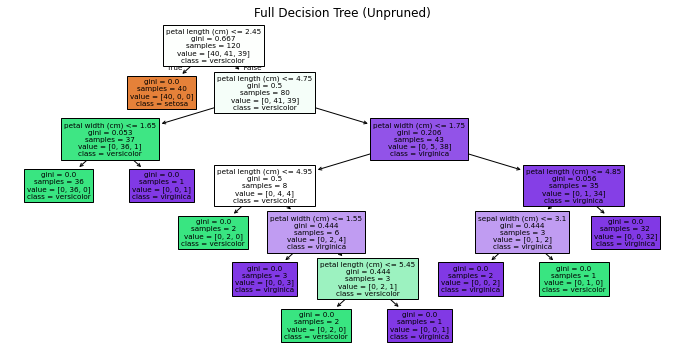


First split feature: petal length (cm), Threshold: 2.450

[Unpruned Tree] Depth: 6
[Pruned Tree] Test Accuracy (max_depth=3): 1.000
[Pruned Tree] Depth: 3


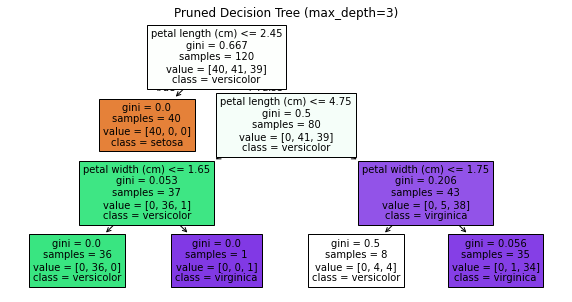

In [6]:
# TODO: Provide and execute your code implementations here
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# ---------------------------------------------
# 1. Load and Split the Data
# ---------------------------------------------

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# ---------------------------------------------
# 2. Train a Decision Tree
# ---------------------------------------------

# Train without pruning
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)

# Report accuracy
train_acc = accuracy_score(y_train, clf_full.predict(X_train))
test_acc = accuracy_score(y_test, clf_full.predict(X_test))

print(f"\n[Unpruned Tree] Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}")

# ---------------------------------------------
# 3. Visualize the Tree
# ---------------------------------------------

plt.figure(figsize=(12, 6))
plot_tree(clf_full, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Full Decision Tree (Unpruned)")
plt.show()

# Interpret the root split
root_feature_idx = clf_full.tree_.feature[0]
root_threshold = clf_full.tree_.threshold[0]
print(f"\nFirst split feature: {iris.feature_names[root_feature_idx]}, Threshold: {root_threshold:.3f}")

# ---------------------------------------------
# 4. Tree Depth & Pruning
# ---------------------------------------------

# Original tree depth
print(f"\n[Unpruned Tree] Depth: {clf_full.get_depth()}")

# Pruned tree with max_depth=3
clf_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_pruned.fit(X_train, y_train)

# Report accuracy
pruned_test_acc = accuracy_score(y_test, clf_pruned.predict(X_test))
print(f"[Pruned Tree] Test Accuracy (max_depth=3): {pruned_test_acc:.3f}")
print(f"[Pruned Tree] Depth: {clf_pruned.get_depth()}")

# Visualize the pruned tree
plt.figure(figsize=(10, 5))
plot_tree(clf_pruned, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Pruned Decision Tree (max_depth=3)")
plt.show()


**Effect of Pruning:**  
Pruning reduces the depth and complexity of the tree. In this example, the pruned tree (with `max_depth=3`) may slightly reduce overfitting and improve generalization. If the unpruned tree performs significantly better on training data than on test data, it's a sign of overfitting. Pruning helps mitigate this by simplifying the model.